### 3

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

def newtonsys(f, jac, x_0, 
              maxiter=40, 
              ftol=1000*np.finfo(float).eps, 
              xtol=1000*np.finfo(float).eps):
    """
    newtonsys(f, jac, x_0 [maxiter,ftol,xtol])

    Use Newton's method to find a root of a system of equations,
    starting from `x_0`. The functions `f` and `jac` should return the
    residual vector and the Jacobian matrix, respectively. Returns the
    history of root estimates as a vector of vectors.

    The optional keyword parameters set the maximum number of iterations
    and the stopping tolerance for values of `f` and changes in `x`.
    """
    x = [np.array(x_0, dtype=float)]
    y, J = f(x_0), jac(x_0)
    delta_x = np.inf  # for initial pass below
    k = 0

    while (np.linalg.norm(delta_x) > xtol) and (np.linalg.norm(y) > ftol):
        delta_x = -np.linalg.solve(J, y)  # Newton step
        x.append(x[k] + delta_x)  # append to history
        k += 1
        y, J = f(x[k]), jac(x[k])

        if k == maxiter:
            print("Warning: Maximum number of iterations reached.")
            break
    return x

In [2]:
def f(x):
    u, v = x
    return np.array(
        [u * np.log(u) + v * np.log(v) + 0.3, u**4 + v**2 - 1]
    )

def jac(x):
    u, v = x
    return np.array(
        [[np.log(u) + 1, np.log(v) + 1],
         [4 * u**3, 2 * v]]
    )

x_0 = np.array([1, 0.1])
x_seq = newtonsys(f, jac, x_0)

print(f"intersection of curves at {x_seq[-1]}")

intersection of curves at [0.9935067  0.16037863]


In [3]:
# check the intersection
f(x_seq[-1])

array([0., 0.])

In [4]:
# for another initial point
x_0 = np.array([0.1, 1])
x_seq = newtonsys(f, jac, x_0)

print(f"intersection of curves at {x_seq[-1]}")

intersection of curves at [0.16790519 0.99960252]


In [5]:
# check the intersection
f(x_seq[-1])

array([0., 0.])

### 4

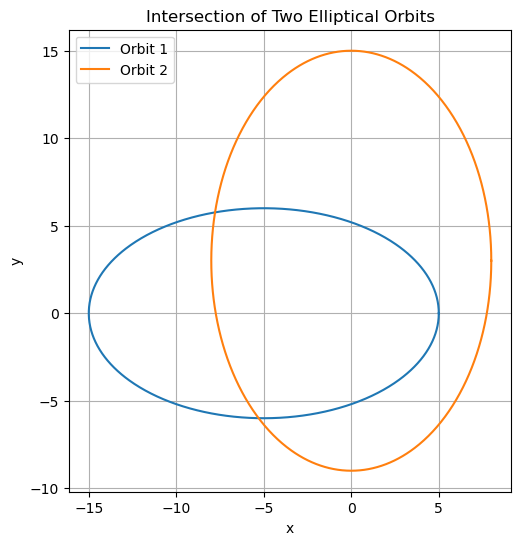

In [6]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2*np.pi, 1000)

# the first elliptical orbit
x_1 = -5 + 10 * np.cos(t)
y_1 = 6 * np.sin(t)

# the second elliptical orbit
x_2 = 8 * np.cos(t)
y_2 = 3 + 12 * np.sin(t)

plt.figure(figsize=(8, 6))
plt.plot(x_1, y_1, label="Orbit 1")
plt.plot(x_2, y_2, label="Orbit 2")
plt.gca().set_aspect("equal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Intersection of Two Elliptical Orbits")
plt.grid(True)
plt.show()

In [7]:
def f(z):
    x, y = z
    f_1 = ((x + 5)**2)/100 + (y**2)/36 - 1
    f_2 = (x**2)/64 + ((y - 3)**2)/144 - 1
    return np.array([f_1, f_2])

def jac(z):
    x, y = z
    J = np.array([
        [(x + 5)/50, y/18],
        [x/32, (y - 3)/72]
    ])
    return J

# give initial guesses from the plot above
initial_guesses = [
    [-5, 5],
    [-5, -5],
]

# use newton method to find the root
solutions = []
for guess in initial_guesses:
    x_seq = newtonsys(f, jac, guess)
    solutions.append(x_seq[-1])

print(f"the first intersection: {solutions[0]}")
print(f"the second intersection: {solutions[1]}")

the first intersection: [-7.78511561  5.76259726]
the second intersection: [-5.29345533 -5.99741596]


### 5

In [8]:
import numpy as np

def f(u):
    x, y, z, lam = u
    f_1 = x - 5 - (lam * x) / 25
    f_2 = y - 4 - (lam * y) / 16
    f_3 = z - 3 - (lam * z) / 9
    f_4 = (x**2)/25 + (y**2)/16 + (z**2)/9 - 1
    return np.array([f_1, f_2, f_3, f_4])

def jac(u):
    x, y, z, lam = u
    J = np.array([
        [1 - lam/25, 0, 0, -x/25],
        [0, 1 - lam/16, 0, -y/16],
        [0, 0, 1 - lam/9, -z/9],
        [2*x/25, 2*y/16, 2*z/9, 0]
    ])
    return J

In [9]:
# give an initial guess and check whether f(x) = 0
initial_guess = np.array([5, 4, 3, 1])

x_seq = newtonsys(f, jac, initial_guess)
x_sol = x_seq[-1]

print(x_sol)
print(f(x_sol))

[  3.42413358   2.32680016   1.31671443 -11.50558519]
[ 0.00000000e+00 -2.22044605e-16  2.22044605e-16  0.00000000e+00]


In [10]:
# auto find roots
initial_guesses = [
    np.random.uniform(-10, 10, 4) for _ in range(100)
]

solutions = []
for guess in initial_guesses:
    x_seq = newtonsys(f, jac, guess)
    x_sol = x_seq[-1]
    if np.linalg.norm(f(x_sol)) < 1e-6:  # save if solution is close to zero
        solutions.append(x_sol)

# remove duplicates
unique_solutions = np.unique(np.round(solutions, decimals=4), axis=0)

for sol in unique_solutions:
    print(sol)

[-4.4037 -1.7119 -0.6083 53.385 ]
[  3.4241   2.3268   1.3167 -11.5056]


In [11]:
u_1, u_2 = unique_solutions
u_1, u_2 = u_1[:-1], u_2[:-1]  # remove the last element from each list
print(f"the distance between u_1 to (5, 4, 3) is {np.linalg.norm(u_1 - np.array([5, 4, 3]))}")
print(f"the distance between u_2 to (1, 1, 1) is {np.linalg.norm(u_2 - np.array([1, 1, 1]))}")

the distance between u_1 to (5, 4, 3) is 11.579084773417977
the distance between u_2 to (1, 1, 1) is 2.781538771974966


### 6

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f(vars):
    a, b, r = vars
    f_1 = (a + 5)**2 + b**2 - r**2
    f_2 = (a - 1)**2 + (b + 3)**2 - r**2
    f_3 = (a - 4)**2 + (b - 2)**2 - r**2
    return [f_1, f_2, f_3]

def jac(vars):
    a, b, r = vars
    return [
        [2*(a + 5), 2*b, -2*r],
        [2*(a - 1), 2*(b + 3), -2*r],
        [2*(a - 4), 2*(b - 2), -2*r]
    ]

initial_guess = [
    (-5 + 1 + 4)/3,
    (0 + (-3) + 2)/3,
    10
]

x_seq = newtonsys(f, jac, initial_guess)
x_sol = x_seq[-1]
a, b, r = x_sol

print(f"center: ({a:.4f}, {b:.4f}), radius: {r:.4f}")

center: (-0.5769, 1.3462), radius: 4.6234


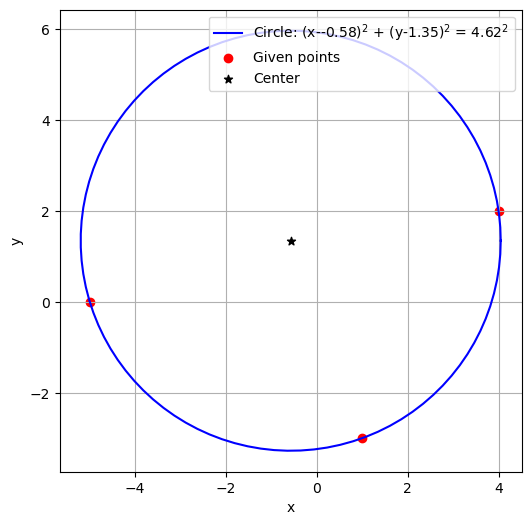

In [13]:
theta = np.linspace(0, 2*np.pi, 100)
x_circle = a + r * np.cos(theta)
y_circle = b + r * np.sin(theta)

plt.figure(figsize=(8, 6))
plt.plot(x_circle, y_circle, color='blue', 
         label=f"Circle: (x-{a:.2f})$^2$ + (y-{b:.2f})$^2$ = {r:.2f}$^2$")
plt.scatter([-5, 1, 4], [0, -3, 2], color='red', label='Given points')
plt.scatter(a, b, color='black', marker='*', label='Center')
plt.gca().set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()